In [1]:
import pandas as pd 
import numpy as np
import re
import sys, getopt
import csv
import os
import matplotlib.pyplot as plt
import seaborn as sns

def load_csv_dataset(file_path):
    return pd.read_csv(file_path)

os.chdir('/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings')

os.getcwd()

'/Users/finneganlaister-smith/Downloads/DEV ENVIRONMENT/data-science-jupyter-template-main/footy_project_market_value_rankings'

In [10]:
latest_match_data = load_csv_dataset('create_dataset_1/CSVs we use often/latest_match_data_july_21_superstar_info_recalculated_columns_added.csv')
latest_match_data = latest_match_data.drop(columns = ['Unnamed: 0'])
latest_match_data = latest_match_data.drop(columns = ['Unnamed: 0.1'])
pd.set_option('display.max_columns', None)

## Win % by opposition's number of 0 value players

### WHEN YOU HAVE N0 0-VALUE PLAYERS

In [14]:
# Assuming latest_match_data is already loaded as a DataFrame

results = []

for i in range(12):
    # Filter for Team.1.Num.of.0.Value.Players == i
    team1_subset = latest_match_data[(latest_match_data['Team.1.Num.of.0.Value.Players'] == i) & (latest_match_data['Team.2.Num.of.0.Value.Players'] == 0)]
    team1_count = len(team1_subset)
    team2_wins_sum = team1_subset['Team.2.Wins'].sum()
    
    # Filter for Team.2.Num.of.0.Value.Players == i
    team2_subset = latest_match_data[(latest_match_data['Team.2.Num.of.0.Value.Players'] == i) & (latest_match_data['Team.1.Num.of.0.Value.Players'] == 0)]
    team2_count = len(team2_subset)
    team1_wins_sum = team2_subset['Team.1.Wins'].sum()
    
    # Calculate weighted average
    total_count = team1_count + team2_count
    if total_count > 0:
        weighted_avg = (team2_wins_sum + team1_wins_sum) / total_count
    else:
        weighted_avg = 0
    
    results.append([i, team1_count, team2_wins_sum, team2_count, team1_wins_sum, weighted_avg])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Num.of.0.Value.Players', 'Team.1.Count', 'Team.2.Wins.Sum', 'Team.2.Count', 'Team.1.Wins.Sum', 'Weighted.Average'])

results_df

,Num.of.0.Value.Players,Team.1.Count,Team.2.Wins.Sum,Team.2.Count,Team.1.Wins.Sum,Weighted.Average
0,0,2889,950,2889,1312,0.391485
1,1,202,92,244,156,0.556054
2,2,115,50,99,74,0.579439
3,3,82,45,80,65,0.679012
4,4,57,37,63,48,0.708333
5,5,64,38,57,49,0.719008
6,6,41,28,55,45,0.760417
7,7,44,31,36,30,0.762500
8,8,34,24,37,36,0.845070
9,9,29,24,36,34,0.892308


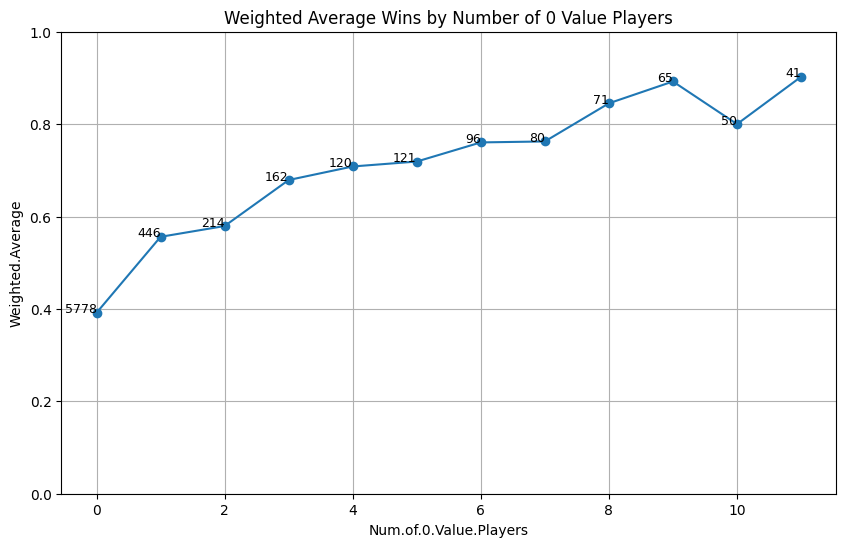

In [18]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(results_df['Num.of.0.Value.Players'], results_df['Weighted.Average'], marker='o', linestyle='-')

# Adding text annotations
for i, row in results_df.iterrows():
    total_count = int(row['Team.1.Count'] + row['Team.2.Count'])
    plt.text(row['Num.of.0.Value.Players'], row['Weighted.Average'], str(total_count), fontsize=9, ha='right')

# Adding labels and title
plt.xlabel('Num.of.0.Value.Players')
plt.ylabel('Weighted.Average')
plt.title('Weighted Average Wins by Number of 0 Value Players')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()

### WHEN YOU HAVE AT LEAST 1

In [23]:
# Assuming latest_match_data is already loaded as a DataFrame

results = []

for i in range(12):
    # Filter for Team.1.Num.of.0.Value.Players == i
    team1_subset = latest_match_data[(latest_match_data['Team.1.Num.of.0.Value.Players'] == i) & (latest_match_data['Team.2.Num.of.0.Value.Players'] >= 1)]
    team1_count = len(team1_subset)
    team2_wins_sum = team1_subset['Team.2.Wins'].sum()
    
    # Filter for Team.2.Num.of.0.Value.Players == i
    team2_subset = latest_match_data[(latest_match_data['Team.2.Num.of.0.Value.Players'] == i) & (latest_match_data['Team.1.Num.of.0.Value.Players'] >= 1)]
    team2_count = len(team2_subset)
    team1_wins_sum = team2_subset['Team.1.Wins'].sum()
    
    # Calculate weighted average
    total_count = team1_count + team2_count
    if total_count > 0:
        weighted_avg = (team2_wins_sum + team1_wins_sum) / total_count
    else:
        weighted_avg = 0
    
    results.append([i, team1_count, team2_wins_sum, team2_count, team1_wins_sum, weighted_avg])

# Create a DataFrame for the results
results_df = pd.DataFrame(results, columns=['Num.of.0.Value.Players', 'Team.1.Count', 'Team.2.Wins.Sum', 'Team.2.Count', 'Team.1.Wins.Sum', 'Weighted.Average'])

results_df

,Num.of.0.Value.Players,Team.1.Count,Team.2.Wins.Sum,Team.2.Count,Team.1.Wins.Sum,Weighted.Average
0,0,753,65,713,128,0.131651
1,1,201,26,176,60,0.228117
2,2,116,22,122,51,0.306723
3,3,79,22,82,29,0.316770
4,4,74,21,85,38,0.371069
5,5,68,11,71,29,0.287770
6,6,74,16,70,33,0.340278
7,7,75,19,73,44,0.425676
8,8,47,20,50,29,0.505155
9,9,70,27,65,42,0.511111


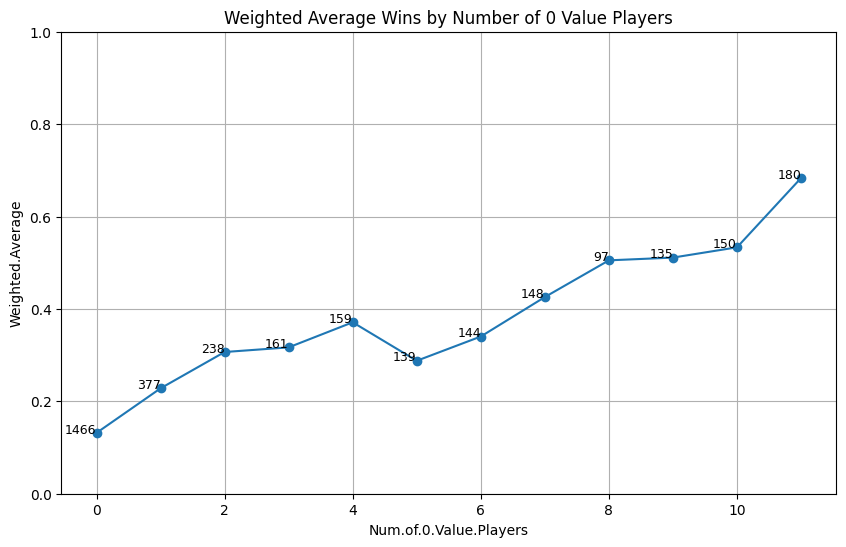

In [24]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(results_df['Num.of.0.Value.Players'], results_df['Weighted.Average'], marker='o', linestyle='-')

# Adding text annotations
for i, row in results_df.iterrows():
    total_count = int(row['Team.1.Count'] + row['Team.2.Count'])
    plt.text(row['Num.of.0.Value.Players'], row['Weighted.Average'], str(total_count), fontsize=9, ha='right')

# Adding labels and title
plt.xlabel('Num.of.0.Value.Players')
plt.ylabel('Weighted.Average')
plt.title('Weighted Average Wins by Number of 0 Value Players')
plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
plt.grid(True)
plt.show()